In [11]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import psycopg2
from stories import *

st.set_page_config(layout="wide")
st.title('Results of Experiments')

DeltaGenerator()

In [12]:
conn_string = "dbname=thesis user=postgres password=postgres"
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
command = "SELECT * FROM panel"
cursor.execute(command)
results = cursor.fetchall()
conn.commit()
cursor.close()

Connection established


In [13]:
def load_panel(conn, story=None, version=None):
    cursor = conn.cursor()
    command = "SELECT * FROM panel"
    if story and not version:
        command += " WHERE story = '{}'".format(story)
    if not story and version:
        command += " WHERE version = {}".format(version)
    if story and version:
        command += " WHERE story = '{}' AND version = {}".format(story, version)
    #st.write(command)
    #result_list = []
    result = None
    try:
        cursor.execute(command)
        result = cursor.fetchall()
        #for r in results:
        #    dicc_result = {"id":r[0], "prompt1":r[1], "prompt2":r[2], "encoding":r[3], "story":r[4], "story_1":r[5], "story_2":r[6], "version":r[7], "file":r[8], "created_at":r[9], "llm":r[10], "id_result":r[11], "file2":r[12], "kpi":r[13], "diff_lines":r[14], "errors":r[15], "n_models":r[16], "symbols":r[17], "matchs":r[18], "match_ratio":r[19], "created_at_result":r[20]}
        #    results.append(dicc_result)
        conn.commit()
        cursor.close()
    except Exception as err:
        #st.write(command)
        #st.write(f"Unexpected {err=}, {type(err)=} Bad Query.")
        conn.commit()
        cursor.close()
        pass
    #st.write(result_list)
    return result

In [16]:
results = load_panel(conn,version=9)

In [18]:
len(results[0])

24

In [19]:
results[0]

(570,
 'creek_from_seeknumbers_and_yosenabe_v9_20231203.lp',
 'Given a problem and a representation in ASP, write generation rules to generate the expected output using the input predicates. Do not write contraints nor try to solve the whole problem, but just write the generation rules.\n            \n        Problem 1:\n                    Given a square grid, the goal is to construct a directed path by linking horizontally or vertically adjacent cells such that:\n    - the path starts at the cell marked with a white circle and ends at the cell marked with a black circle,\n    - the path traverses each remaining cell of the square grid without ever crossing or intersecting itself,\n    - between a cell with a (positive) number and the next cell with a number or the cell marked with a black circle, respectively, the path bends exactly as often as the number in the first cell indicates, and\n    - the path does not bend between the cell marked with a white circle and the first cell with

In [2]:
sql = "SELECT column_name FROM information_schema.columns WHERE table_schema = 'public' AND table_name = 'panel'"
cursor = conn.cursor()
cursor.execute(sql)
columns = cursor.fetchall()
conn.commit()
cursor.close()

In [3]:
columns = [x[0] for x in columns]

In [4]:
columns

['id',
 'file',
 'prompt1',
 'prompt2',
 'encoding',
 'story',
 'story_1',
 'story_2',
 'version',
 'created_at',
 'id_result',
 'kpi',
 'diff_lines',
 'repeated',
 'n_models',
 'errors',
 'n_errors',
 'symbols',
 'matchs',
 'accuracy',
 'precision',
 'recall',
 'f1_score',
 'jaccard']

In [5]:
df = pd.DataFrame(results, columns = columns)

In [6]:
df.head(3)

,id,file,prompt1,prompt2,encoding,story,story_1,story_2,version,created_at,...,n_models,errors,n_errors,symbols,matchs,accuracy,precision,recall,f1_score,jaccard
0,1,creek_from_minotaur_and_seeknumbers_v2_2023112...,"Given a problem and some predicates, write ASP...",Consider the constraint in the following form\...,% The possible cells that can be blackened are...,creek,minotaur,seeknumbers,2,2023-11-29 18:39:03.496333,...,0,,0,[],0,0.0,0.0,0.0,0.0,0.0
1,2,creek_from_minotaur_and_sudoku_v2_20231129.lp,"Given a problem and some predicates, write ASP...",Consider the constraint in the following form\...,% The possible cells to blacken are the ones t...,creek,minotaur,sudoku,2,2023-11-29 18:39:55.981506,...,0,parsing failed,1,[],0,0.0,0.0,0.0,0.0,0.0
2,3,creek_from_minotaur_and_yosenabe_v2_20231129.lp,"Given a problem and some predicates, write ASP...",Consider the constraint in the following form\...,% All the possible directi...,creek,minotaur,yosenabe,2,2023-11-29 18:40:53.772470,...,0,parsing failed,1,[],0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_story = df[['story','kpi','diff_lines','n_models','n_errors','jaccard']]
df_story_1 = df[['story_1','kpi','diff_lines','n_models','n_errors','jaccard']]
df_story_2 = df[['story_2','kpi','diff_lines','n_models','n_errors','jaccard']]
df_version = df[['version','kpi','diff_lines','n_models','n_errors','jaccard']]
df_story_version = df[['story','version','kpi','diff_lines','n_models','n_errors','jaccard']]

In [8]:
df_story_mean = df_story.groupby('story').mean()
df_story_1_mean = df_story_1.groupby('story_1').mean()
df_story_2_mean = df_story_2.groupby('story_2').mean()
df_version_mean = df_version.groupby('version').mean()
df_story_version_mean = df_story_version.groupby(['story','version']).mean()

In [9]:
df_story_mean

,kpi,diff_lines,n_models,n_errors,jaccard
story,,,,,
creek,-19.755034,20.771812,2.100671,0.483221,0.089530
hop,-70.064667,34.566667,0.846667,0.720000,0.058467
lights,16.610738,13.328859,2.604027,0.577181,0.138389
minotaur,-31.547222,33.423611,1.701389,0.465278,0.031181
seeknumbers,-17.610067,23.241611,0.503356,0.536913,0.048456
sudoku,2.598667,23.686667,3.520000,0.173333,0.400867
yosenabe,1.579333,16.953333,1.586667,0.486667,0.050267


In [10]:
def plot_measure(df,measure1='jaccard',measure2='kpi'):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16.5,2.5))
    ax1.bar(df.index,df[measure1], label=measure1)
    ax2.bar(df.index,df[measure2], label=measure2)
    plt.legend()
    #plt.show()
    return plt

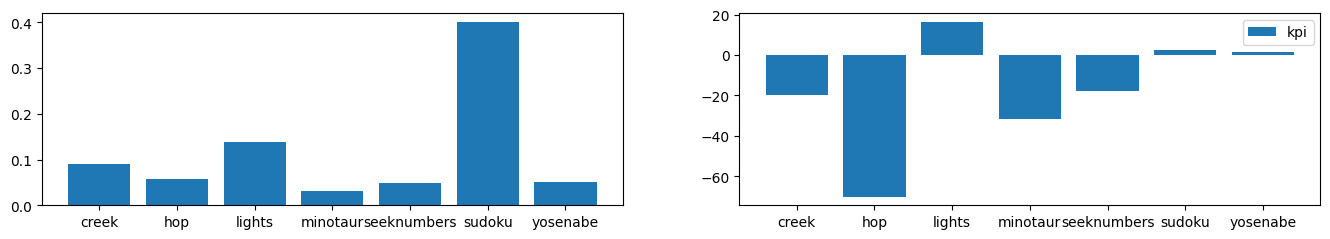

In [11]:
ppl = plot_measure(df_story_mean, 'jaccard')

<module 'matplotlib.pyplot' from 'C:\\Users\\acordova\\thesis\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

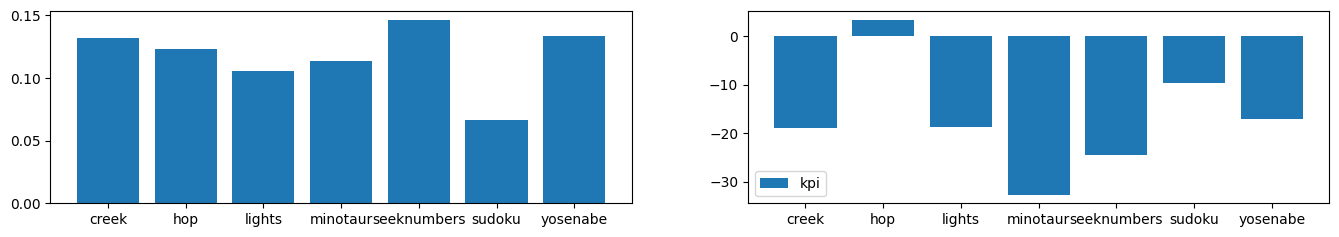

In [12]:
plot_measure(df_story_1_mean, 'jaccard')

<module 'matplotlib.pyplot' from 'C:\\Users\\acordova\\thesis\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

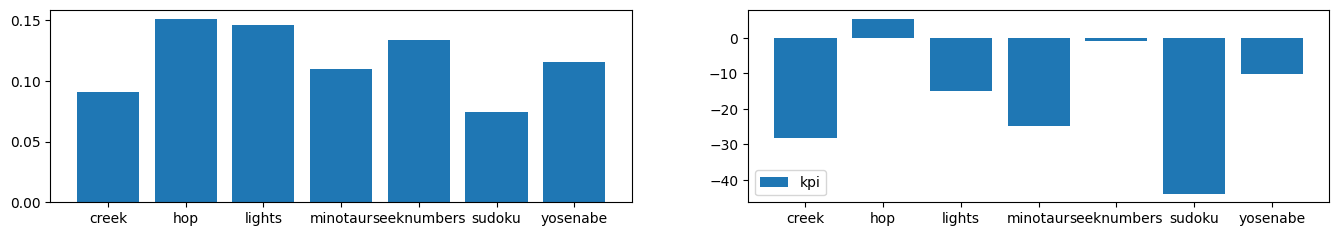

In [13]:
plot_measure(df_story_2_mean, 'jaccard')

<module 'matplotlib.pyplot' from 'C:\\Users\\acordova\\thesis\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

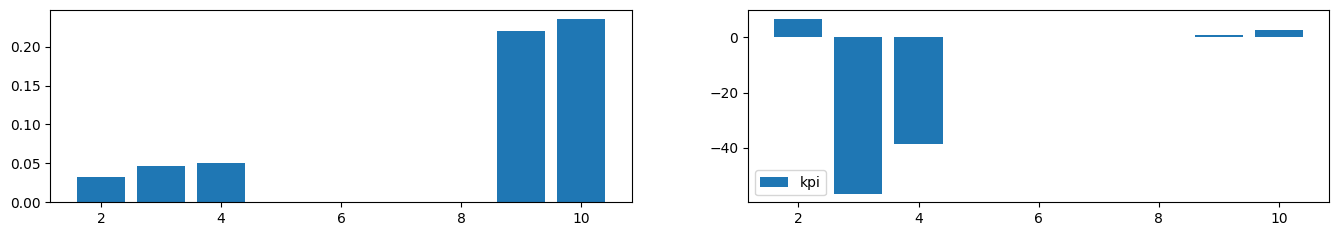

In [14]:
plot_measure(df_version_mean, 'jaccard')

C:\Users\acordova\AppData\Local\Temp\ipykernel_21364\4251012055.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df.combined,rotation='vertical')
C:\Users\acordova\AppData\Local\Temp\ipykernel_21364\4251012055.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df.combined,rotation='vertical')


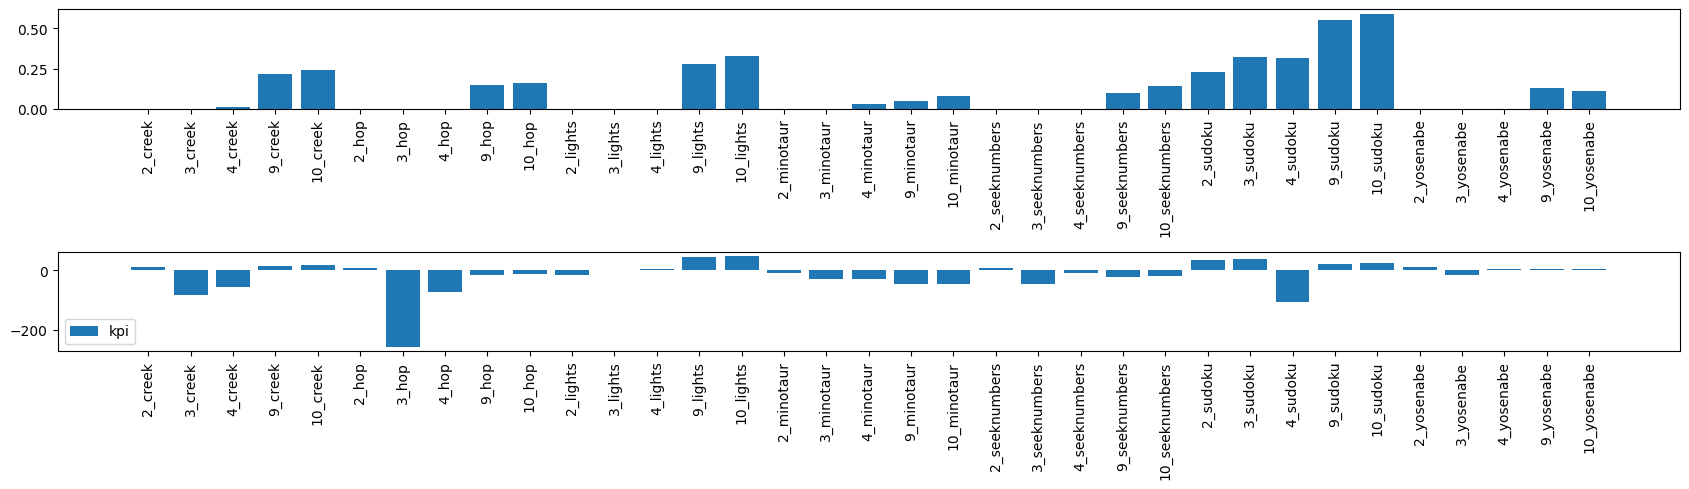

In [108]:
measure1='jaccard'
measure2='kpi'
df = df_story_version_mean.reset_index()
df["combined"] = df["version"].astype(str) + "_" + df["story"]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(17,5))
ax1.bar(df.combined,df[measure1], label=measure1)
ax1.set_xticklabels(df.combined,rotation='vertical')
ax2.bar(df.combined,df[measure2], label=measure2)
ax2.set_xticklabels(df.combined,rotation='vertical')
fig.tight_layout()
plt.legend()
plt.show()